# Author- Rohan Kulkarni

## Problem Statement : 
    1.Build Predictive model if the loan has to be approved or not
    2.Run the campign which will target good customers and offer them some new loan

In [145]:
import pandas as pd

In [146]:
df=pd.read_csv("C:/Users/_RoXstaR_/OneDrive/Desktop/CreditRisk.csv")

In [147]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [148]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [149]:
df.Credit_History = df.Credit_History.fillna(1)
df.Gender = df.Gender.fillna("Male")
df.Married= df.Married.fillna("No")
df.Dependents = df.Dependents.fillna(0)
df.Self_Employed = df.Self_Employed.fillna("Yes")
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.LoanAmount.mean())

In [150]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [151]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.00000,360.0,1.0,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,N


In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [154]:
LE=LabelEncoder()
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [155]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,970,1,1,4.0,1,1,4009,1777.0,113.00000,360.0,1.0,2,1
977,972,1,1,0.0,0,0,4158,709.0,115.00000,360.0,1.0,2,1
978,975,1,0,0.0,0,0,3250,1993.0,126.00000,360.0,1.0,1,1
979,978,1,1,0.0,0,0,5000,2393.0,158.00000,360.0,1.0,0,0


In [156]:
df1=df



In [46]:
df.drop(columns='Loan_ID',inplace=True)

### Sampling (Train & Test)

In [47]:

from sklearn.model_selection import train_test_split

In [48]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [50]:
print(X_train.shape)


(784, 11)


In [51]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()

In [52]:
logistic_reg.fit(X_train,y_train)

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predict_cr=logistic_reg.predict(X_test)

In [54]:
predict_cr

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [55]:
len(predict_cr)

197

In [56]:
y_test

942    1
704    1
754    0
740    0
546    0
      ..
11     1
366    0
476    1
218    0
810    0
Name: Loan_Status, Length: 197, dtype: int32

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
tab_cr= confusion_matrix( predict_cr,y_test) # in matrix 1st we will take predicted values. In these, we see actual values from top and predicted from left to right
tab_cr


array([[ 31,   2],
       [ 31, 133]], dtype=int64)

In [59]:
tab_cr.diagonal()

array([ 31, 133], dtype=int64)

In [60]:
tab_cr.diagonal().sum()

164

In [61]:
accuracy=tab_cr.diagonal().sum()/ tab_cr.sum()
accuracy

0.8324873096446701

In [62]:

logistic_reg.coef_

array([[ 3.04256524e-01,  5.28165393e-01, -2.27970200e-01,
        -4.14152787e-01,  1.02562806e-01,  1.45401633e-06,
        -5.31097587e-05, -1.74193710e-03, -7.23444169e-03,
         3.43604004e+00,  5.40821500e-01]])

In [63]:
logistic_reg.intercept_

array([0.28497128])

In [64]:
# we did prediction in categories but we can do prediction in probability also

In [72]:
predict_probability_train=logistic_reg.predict_proba(X_train)
predict_probability_test=logistic_reg.predict_proba(X_test)


In [73]:
predict_probability_test

array([[0.30712286, 0.69287714],
       [0.15337503, 0.84662497],
       [0.90632687, 0.09367313],
       [0.74034349, 0.25965651],
       [0.02282021, 0.97717979],
       [0.11614148, 0.88385852],
       [0.10634078, 0.89365922],
       [0.19852694, 0.80147306],
       [0.05589347, 0.94410653],
       [0.11332055, 0.88667945],
       [0.93327602, 0.06672398],
       [0.17882612, 0.82117388],
       [0.11550155, 0.88449845],
       [0.17898564, 0.82101436],
       [0.10174962, 0.89825038],
       [0.11063851, 0.88936149],
       [0.18789865, 0.81210135],
       [0.1117437 , 0.8882563 ],
       [0.09322712, 0.90677288],
       [0.26124023, 0.73875977],
       [0.2863378 , 0.7136622 ],
       [0.10250128, 0.89749872],
       [0.76923621, 0.23076379],
       [0.13786731, 0.86213269],
       [0.17336494, 0.82663506],
       [0.81460937, 0.18539063],
       [0.55327943, 0.44672057],
       [0.10199425, 0.89800575],
       [0.21680615, 0.78319385],
       [0.19226883, 0.80773117],
       [0.

In [74]:
0.13148898 + 0.86851102

1.0

In [75]:
predict_cr

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

As we can see in predicted probability of test set in each array sum of the values are always equal 1. there are two classes 0 & 1 where any of the class containing higher value that will be our probabilitic class.

In [77]:
predict_probability_test=pd.DataFrame(predict_probability_test)

In [79]:
predict_probability_test.rename(columns={predict_probability_test.columns[0]:'Prediction_prob_0',
                                         predict_probability_test.columns[1]:'Prediction_prob_1'})

,Prediction_prob_0,Prediction_prob_1
0,0.307123,0.692877
1,0.153375,0.846625
2,0.906327,0.093673
3,0.740343,0.259657
4,0.022820,0.977180
...,...,...
192,0.083682,0.916318
193,0.282932,0.717068
194,0.120879,0.879121
195,0.804979,0.195021


#### AUROC curve

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve

In [81]:
fpr, tpr, threshold = roc_curve(y_test,predict_probability_test.iloc[:,1])

In [82]:
fpr

array([0.        , 0.        , 0.        , 0.01612903, 0.01612903,
       0.0483871 , 0.0483871 , 0.06451613, 0.06451613, 0.09677419,
       0.09677419, 0.11290323, 0.11290323, 0.14516129, 0.14516129,
       0.16129032, 0.16129032, 0.17741935, 0.17741935, 0.19354839,
       0.19354839, 0.22580645, 0.22580645, 0.24193548, 0.24193548,
       0.25806452, 0.25806452, 0.29032258, 0.29032258, 0.30645161,
       0.30645161, 0.32258065, 0.32258065, 0.33870968, 0.33870968,
       0.37096774, 0.37096774, 0.38709677, 0.38709677, 0.40322581,
       0.40322581, 0.43548387, 0.43548387, 0.4516129 , 0.4516129 ,
       0.46774194, 0.46774194, 0.48387097, 0.48387097, 0.5       ,
       0.5       , 0.74193548, 0.74193548, 0.88709677, 0.88709677,
       1.        ])

In [83]:
tpr

array([0.        , 0.00740741, 0.02222222, 0.02222222, 0.05185185,
       0.05185185, 0.0962963 , 0.0962963 , 0.11851852, 0.11851852,
       0.14074074, 0.14074074, 0.16296296, 0.16296296, 0.36296296,
       0.36296296, 0.39259259, 0.39259259, 0.4       , 0.4       ,
       0.46666667, 0.46666667, 0.48148148, 0.48148148, 0.61481481,
       0.61481481, 0.65925926, 0.65925926, 0.6962963 , 0.6962963 ,
       0.72592593, 0.72592593, 0.74814815, 0.74814815, 0.77777778,
       0.77777778, 0.78518519, 0.78518519, 0.88148148, 0.88148148,
       0.88888889, 0.88888889, 0.91111111, 0.91111111, 0.94074074,
       0.94074074, 0.95555556, 0.95555556, 0.96296296, 0.96296296,
       0.98518519, 0.98518519, 0.99259259, 0.99259259, 1.        ,
       1.        ])

In [84]:
import matplotlib.pyplot as plt

In [86]:
area_curve=roc_auc_score(y_test,predict_cr)
area_curve

0.7425925925925926

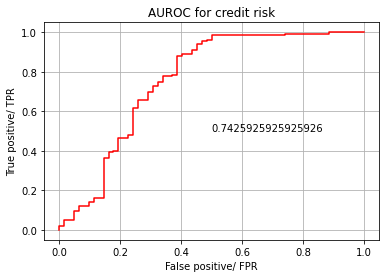

In [93]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('False positive/ FPR')
plt.ylabel('True positive/ TPR')
plt.title('AUROC for credit risk')
plt.text(x=.5, y =.5, s=area_curve, size=10)
plt.grid()

In [94]:
# we calculated our accuracy with formula, but we can also calculate with importing library

In [95]:
accuracy=tab_cr.diagonal().sum()/ tab_cr.sum()
accuracy

0.8324873096446701

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test,predict_cr)

0.8324873096446701

In [103]:
# PRECISION
from sklearn.metrics import precision_score

In [104]:
precision_score(y_test,predict_cr)

0.8109756097560976

In [105]:
tab_cr

array([[ 31,   2],
       [ 31, 133]], dtype=int64)

In [102]:
# precision is 
133/(133+31)

0.8109756097560976

In [111]:
# F1 Score
import numpy as np
# 2* PRECISION * Recall(TPR)/ (PRECISION + RECALL)

2 * 0.8109 * .978/(0.8109+.978)

0.8866456481636761

In [112]:
from sklearn.metrics import f1_score

In [113]:
f1_score(y_test,predict_cr)

0.8896321070234114

In [115]:
# TPR
from sklearn.metrics import recall_score
recall_score(y_test,predict_cr)

0.9851851851851852

## Run the campign which will target good customers and offer them some new loan

In [121]:
pred_full_data=logistic_reg.predict(df.iloc[:, 0:-1])

In [122]:
predict_full_data_proba=logistic_reg.predict_proba(df.iloc[:, 0:-1])

In [138]:
predict_full_data_proba=pd.DataFrame(predict_full_data_proba)

In [142]:
predict_full_data_proba

,Pred_Prob0,Pred_Prob1
0,0.094254,0.905746
1,0.193930,0.806070
2,0.046414,0.953586
3,0.092288,0.907712
4,0.094010,0.905990
...,...,...
976,0.179194,0.820806
977,0.057392,0.942608
978,0.162318,0.837682
979,0.174511,0.825489


In [161]:
predict_full_data_proba.rename(columns ={predict_full_data_proba.columns[0] :"Bad Customers / Pred_Prob0" ,
                                         predict_full_data_proba.columns[1] :"Good Customers / Pred_Prob1"},inplace=True)



In [162]:
type(predict_full_data_proba)

pandas.core.frame.DataFrame

In [163]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,970,1,1,4.0,1,1,4009,1777.0,113.00000,360.0,1.0,2,1
977,972,1,1,0.0,0,0,4158,709.0,115.00000,360.0,1.0,2,1
978,975,1,0,0.0,0,0,3250,1993.0,126.00000,360.0,1.0,1,1
979,978,1,1,0.0,0,0,5000,2393.0,158.00000,360.0,1.0,0,0


In [168]:
predict_full_data_proba=pd.concat([predict_full_data_proba,df1.Loan_ID],axis=1)


,Bad Customers / Pred_Prob0,Good Customers / Pred_Prob1,Loan_ID,Loan_ID,Loan_ID,Loan_ID
0,0.094254,0.905746,0,0,0,0
1,0.193930,0.806070,1,1,1,1
2,0.046414,0.953586,2,2,2,2
3,0.092288,0.907712,3,3,3,3
4,0.094010,0.905990,4,4,4,4
...,...,...,...,...,...,...
976,0.179194,0.820806,970,970,970,970
977,0.057392,0.942608,972,972,972,972
978,0.162318,0.837682,975,975,975,975
979,0.174511,0.825489,978,978,978,978


In [171]:
predict_full_data_proba

,Bad Customers / Pred_Prob0,Good Customers / Pred_Prob1,Loan_ID,Loan_ID,Loan_ID,Loan_ID
0,0.094254,0.905746,0,0,0,0
1,0.193930,0.806070,1,1,1,1
2,0.046414,0.953586,2,2,2,2
3,0.092288,0.907712,3,3,3,3
4,0.094010,0.905990,4,4,4,4
...,...,...,...,...,...,...
976,0.179194,0.820806,970,970,970,970
977,0.057392,0.942608,972,972,972,972
978,0.162318,0.837682,975,975,975,975
979,0.174511,0.825489,978,978,978,978


In [173]:
predict_full_data_proba.sort_values('Good Customers / Pred_Prob1',ascending=False, inplace=True)

In [177]:
predict_full_data_proba.iloc[:,:3]

,Bad Customers / Pred_Prob0,Good Customers / Pred_Prob1,Loan_ID
497,0.005433,0.994567,785
686,0.008619,0.991381,180
575,0.012575,0.987425,917
748,0.012612,0.987388,355
19,0.013071,0.986929,23
...,...,...,...
807,0.958444,0.041556,520
177,0.964853,0.035147,294
696,0.970078,0.029922,208
639,0.972013,0.027987,75


## Lets do Over sampling

In [241]:
df = pd.read_csv(r"C:/Users/_RoXstaR_/OneDrive/Desktop/CreditRisk.csv")
df.Credit_History = df.Credit_History.fillna(1)
df.Gender = df.Gender.fillna("Male")
df.Married = df.Married.fillna("No")
df.Dependents = df.Dependents.fillna(0)
df.Self_Employed = df.Self_Employed.fillna("Yes")
df.LoanAmount = df.LoanAmount.fillna( df.LoanAmount.mean() )
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())






In [242]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [243]:
df.Loan_Status = le.fit_transform(df.Loan_Status)

df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

In [244]:
df1 = df
from sklearn.model_selection import train_test_split
df = df.iloc[: , 1::]
df_train , df_test = train_test_split(df, test_size = .2)

In [245]:
df_train.shape

(784, 12)

In [246]:
df_train.Loan_Status.value_counts()

1    561
0    223
Name: Loan_Status, dtype: int64

In [272]:
ab=df_train[df_train.Loan_Status==0]

In [273]:
df_train1 = pd.concat([df_train,ab,ab])

In [287]:
df_train1.shape

(1230, 12)

In [276]:
df_train1.Loan_Status.value_counts()

0    669
1    561
Name: Loan_Status, dtype: int64

In [277]:
df_train_x = df_train1.iloc[:,0:-1]
df_train_y=df_train1.iloc[:,-1]

In [278]:
df_test_x = df_test.iloc[:,0:-1]
df_test_y=df_test.iloc[:,-1]

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
logi=LogisticRegression()

In [281]:
logi.fit(df_train_x,df_train_y)

LogisticRegression()

In [282]:
pred_test_new=logi.predict(df_test_x)

In [283]:
confusion_matrix(pred_test_new,df_test_y)

array([[ 29,  23],
       [ 17, 128]], dtype=int64)

In [284]:
FPR= 17/(17+29)
FPR

0.3695652173913043

In [285]:
TPR=128/(128+23)
TPR

0.847682119205298

In [288]:
precision=128/(128+17)
precision

0.8827586206896552